# Final CSV File analysis notebook
For this notebook you will require Final CSV file generated by prepare_final_csv.py file
1) This notebook will compare the Arduino system data with the Temperature chamber csv file and plot the final graphs ready for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a consistent style
plt.style.use('seaborn-whitegrid')

C:\Users\kirta\AppData\Local\Temp\ipykernel_18588\2468431865.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
final_csv_path = "Final_20250414_084146.csv" # Put the final csv file path here.

final_csv_df = pd.read_csv(final_csv_path)

In [4]:
final_csv_df['timestamp'] = pd.to_datetime(final_csv_df['timestamp'])
final_csv_df.head()

,step,timestamp,encoder,SIN_P,COS_P,SIN_N,COS_N,cycle,direction,theta,alpha,angle_error,ideal_tmp,actual_tmp
0,0,2025-04-14 08:41:49,0,10328,16186,16259,10373,1,CW,0.000,-0.100317,-0.100317,23.103,22.705
1,1,2025-04-14 08:41:49,614,10032,15878,16542,10686,1,CW,5.526,5.558606,0.032606,23.103,22.705
2,2,2025-04-14 08:41:50,632,9776,15527,16808,11026,1,CW,11.214,11.325551,0.111551,23.103,22.705
3,3,2025-04-14 08:41:50,624,9556,15163,17041,11392,1,CW,16.830,17.043267,0.213267,23.103,22.705
4,4,2025-04-14 08:41:50,639,9356,14780,17231,11786,1,CW,22.581,22.823935,0.242935,23.103,22.705


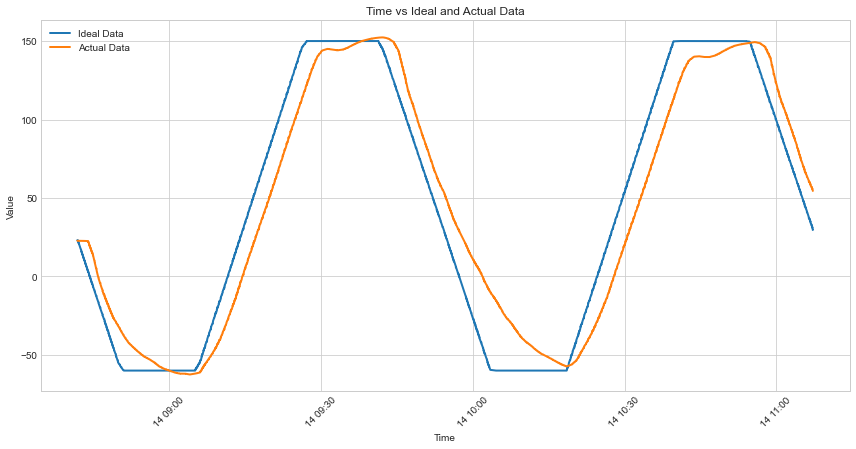

In [5]:
# Plotting Ideal vs Actual temperature chamber data
plt.figure(figsize=(12, 6))
plt.plot(final_csv_df['timestamp'], final_csv_df['ideal_tmp'], label='Ideal Data', linewidth=2)
plt.plot(final_csv_df['timestamp'], final_csv_df['actual_tmp'], label='Actual Data', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time vs Ideal and Actual Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

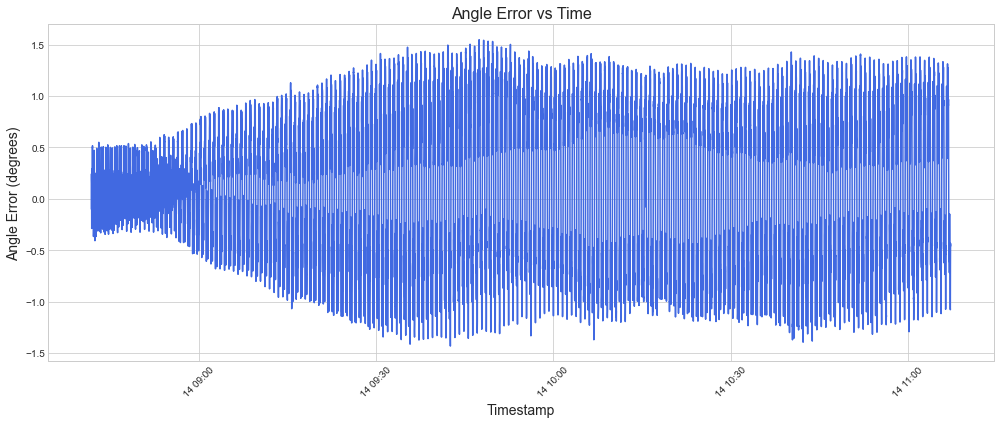

In [6]:
# ==================== Angle Error vs time ====================

plt.figure(figsize=(14, 6))
plt.plot(final_csv_df['timestamp'], final_csv_df['angle_error'], color='royalblue', linewidth=1.5)
plt.title('Angle Error vs Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Angle Error (degrees)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

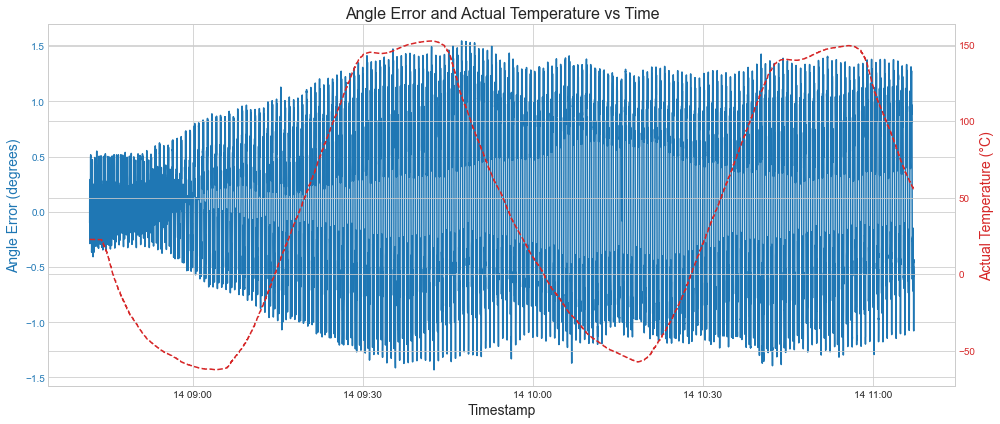

In [7]:
# ==================== Angle Error and Temperature vs Time ====================

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Angle Error (Primary Y-axis)
color = 'tab:blue'
ax1.set_xlabel('Timestamp', fontsize=14)
ax1.set_ylabel('Angle Error (degrees)', color=color, fontsize=14)
ax1.plot(final_csv_df['timestamp'], final_csv_df['angle_error'], color=color, label='Angle Error', linewidth=1.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second y-axis to plot Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Actual Temperature (°C)', color=color, fontsize=14)
ax2.plot(final_csv_df['timestamp'], final_csv_df['actual_tmp'], color=color, label='Actual Temperature', linewidth=1.5, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and Layout
plt.title('Angle Error and Actual Temperature vs Time', fontsize=16)
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

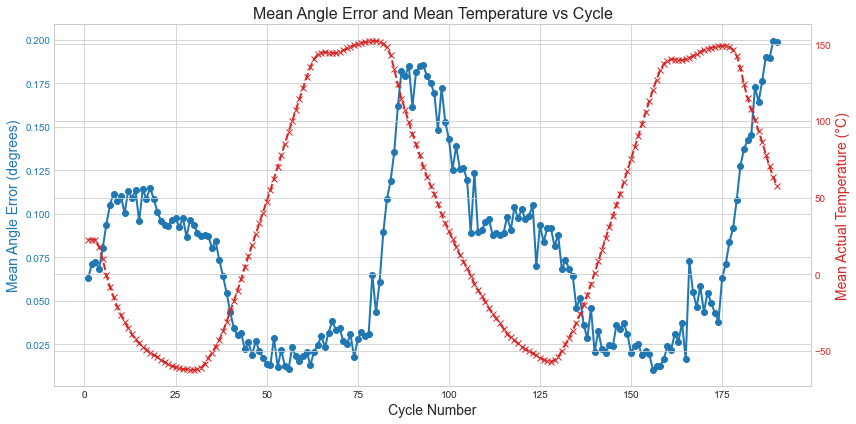

In [8]:
# ==================== Mean Angle Error and Temperature vs Cycle ====================

# Group by cycle and calculate mean values
cycle_group = final_csv_df.groupby('cycle').agg({
    'angle_error': 'mean',
    'actual_tmp': 'mean'
}).reset_index()

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Mean Angle Error (Primary Y-axis)
color = 'tab:blue'
ax1.set_xlabel('Cycle Number', fontsize=14)
ax1.set_ylabel('Mean Angle Error (degrees)', color=color, fontsize=14)
ax1.plot(cycle_group['cycle'], cycle_group['angle_error'], color=color, marker='o', label='Mean Angle Error', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second Y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Actual Temperature (°C)', color=color, fontsize=14)
ax2.plot(cycle_group['cycle'], cycle_group['actual_tmp'], color=color, marker='x', linestyle='--', label='Mean Actual Temperature', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and Layout
plt.title('Mean Angle Error and Mean Temperature vs Cycle', fontsize=16)
fig.tight_layout()
plt.show()

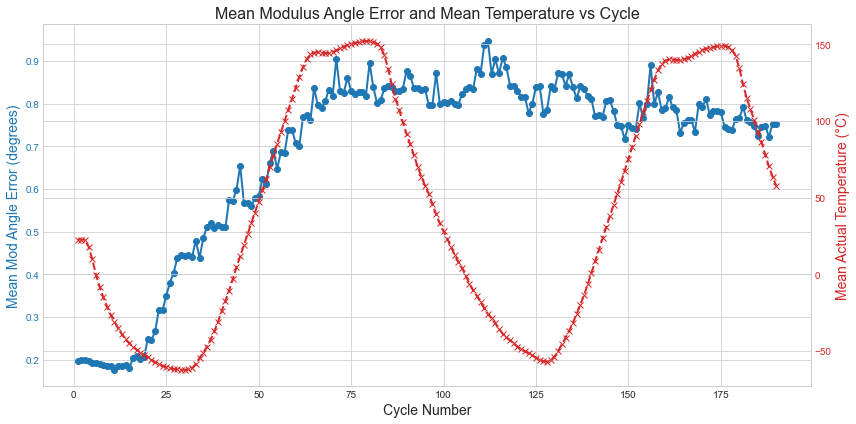

In [9]:
# ==================== Mean |Angle Error| and Temperature vs Cycle ====================

# Apply modulus to angle error (make sure angle error stays within [-90°, +90°] or [0°, 180°])
final_csv_df['angle_error_mod'] = final_csv_df['angle_error'].abs()

# Group by cycle and calculate mean values
cycle_group = final_csv_df.groupby('cycle').agg({
    'angle_error_mod': 'mean',
    'actual_tmp': 'mean'
}).reset_index()

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Mean Mod Angle Error (Primary Y-axis)
color = 'tab:blue'
ax1.set_xlabel('Cycle Number', fontsize=14)
ax1.set_ylabel('Mean Mod Angle Error (degrees)', color=color, fontsize=14)
ax1.plot(cycle_group['cycle'], cycle_group['angle_error_mod'], color=color, marker='o', label='Mean Mod Angle Error', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second Y-axis for Mean Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Actual Temperature (°C)', color=color, fontsize=14)
ax2.plot(cycle_group['cycle'], cycle_group['actual_tmp'], color=color, marker='x', linestyle='--', label='Mean Actual Temperature', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and Layout
plt.title('Mean Modulus Angle Error and Mean Temperature vs Cycle', fontsize=16)
fig.tight_layout()
plt.show()

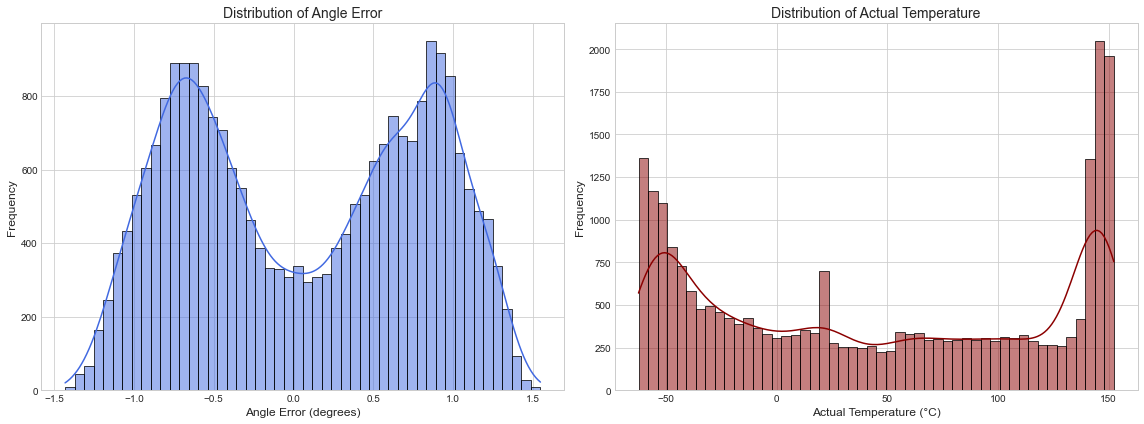

In [10]:
# ==================== Histogram of Angle Error and Temperature ====================

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Histogram of Angle Error ---
sns.histplot(final_csv_df['angle_error'], bins=50, kde=True, color='royalblue', ax=axs[0])
axs[0].set_title('Distribution of Angle Error', fontsize=14)
axs[0].set_xlabel('Angle Error (degrees)', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].grid(True)

# --- Plot 2: Histogram of Actual Temperature ---
sns.histplot(final_csv_df['actual_tmp'], bins=50, kde=True, color='darkred', ax=axs[1])
axs[1].set_title('Distribution of Actual Temperature', fontsize=14)
axs[1].set_xlabel('Actual Temperature (°C)', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()

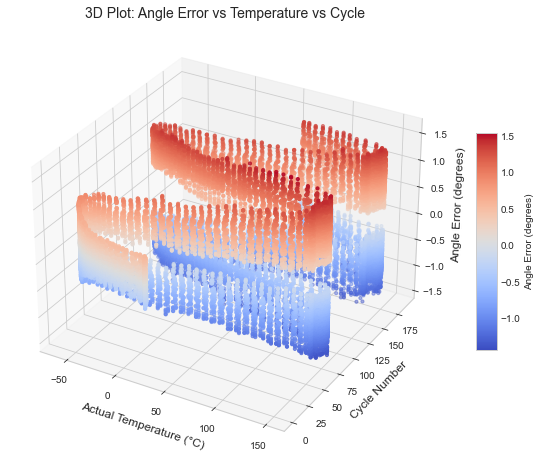

In [11]:
# ==================== 3D Plot: Angle Error vs Temperature vs Cycle ====================

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(final_csv_df['actual_tmp'], final_csv_df['cycle'], final_csv_df['angle_error'],
                     c=final_csv_df['angle_error'], cmap='coolwarm', s=10)

ax.set_title('3D Plot: Angle Error vs Temperature vs Cycle', fontsize=14)
ax.set_xlabel('Actual Temperature (°C)', fontsize=12)
ax.set_ylabel('Cycle Number', fontsize=12)
ax.set_zlabel('Angle Error (degrees)', fontsize=12)

fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, label='Angle Error (degrees)')
plt.show()